In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def f(x):
    return 0.25 * x**4 - x**2 + 2 * x


def f_prime(x):
    return x**3 - 2 * x + 2


def f_double_prime(x):
    return 3 * x**2 - 2


def newton_method(x0, iterations=20):
    x = x0
    for k in range(1, iterations + 1):
        fx = f(x)
        fpx = f_prime(x)
        if fpx == 0:
            print(f"Derivative is zero at iteration {k} — stopping.")
            break
        x = x - fx / fpx
    return x


initial_points = [-1, 0, 0.1, 1, 2]
results = {f"x0 = {x0}": newton_method(x0) for x0 in initial_points}
pd.Series(results)


x0 = -1     0.0
x0 = 0      0.0
x0 = 0.1    0.0
x0 = 1      0.0
x0 = 2      0.0
dtype: float64

Training for lambda = 0.001
Training for lambda = 0.0021544346900318843
Training for lambda = 0.004641588833612777
Training for lambda = 0.01
Training for lambda = 0.021544346900318832
Training for lambda = 0.046415888336127774
Training for lambda = 0.1
Training for lambda = 0.21544346900318823
Training for lambda = 0.46415888336127775
Training for lambda = 1.0


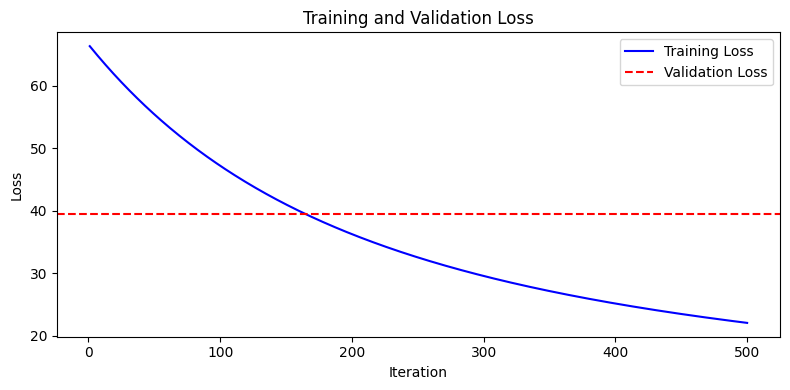

15

In [ ]:
data_dir = Path('.')
train_data = pd.read_csv(data_dir / 'train_data.csv')
val_data = pd.read_csv(data_dir / 'validation_data.csv')

train_X = train_data.iloc[:, :600].to_numpy()
train_y = train_data.iloc[:, 600].to_numpy(dtype=float)
val_X = val_data.iloc[:, :600].to_numpy()
val_y = val_data.iloc[:, 600].to_numpy(dtype=float)

train_mean = train_X.mean(axis=0)
train_std = train_X.std(axis=0, ddof=0)
train_std[train_std == 0] = 1.0

train_X = (train_X - train_mean) / train_std
val_X = (val_X - train_mean) / train_std


def soft_threshold(x, lam):
    return np.sign(x) * np.maximum(0, np.abs(x) - lam)


def proximal_gradient_lasso(X, y, lam, alpha=1e-3, max_iter=500):
    n, p = X.shape
    beta = np.zeros(p)
    train_loss = np.zeros(max_iter)

    for k in range(max_iter):
        gradient = -(X.T @ (y - X @ beta)) / n
        beta = soft_threshold(beta - alpha * gradient, alpha * lam)
        train_loss[k] = np.mean((y - X @ beta) ** 2)

    return {"beta": beta, "train_loss": train_loss}


def validation_loss(X, y, beta):
    return np.mean((y - X @ beta) ** 2)


lambda_values = 10 ** np.linspace(-3, 0, 10)
results = []
val_losses = np.zeros(len(lambda_values))

for i, lam in enumerate(lambda_values):
    print(f"Training for lambda = {lam}")
    res = proximal_gradient_lasso(train_X, train_y, lam=lam)
    results.append(res)
    val_losses[i] = validation_loss(val_X, val_y, res["beta"])

best_index = int(np.argmin(val_losses))
best_lambda = lambda_values[best_index]
best_model = results[best_index]

best_lambda

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(best_model["train_loss"]) + 1), best_model["train_loss"], color='blue', label='Training Loss')
plt.axhline(val_losses[best_index], color='red', linestyle='--', label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

num_zero = int(np.sum(best_model["beta"] == 0))
num_zero
